In [2]:
import pandas as pd
from IPython.display import Image, clear_output 
import matplotlib.pyplot as plt
%matplotlib inline 

## Let’s say you set IoU to 0.5, in that case

if IoU ≥0.5, classify the object detection as True Positive(TP)

if Iou <0.5, then it is a wrong detection and classify it as False Positive(FP)

When a ground truth is present in the image and model failed to detect the object, classify it as False Negative(FN).

True Negative (TN): TN is every part of the image where we did not predict an object. This metrics is not useful for object detection, hence we ignore TN.


## Object Detection Model 
### Yolov5 using Pytorch
- Pre-trained Model : yolov5s.py on coco dataset
- Epoch : 150
- augmentation : No
- Training Image Size : 8900 Images
- Validation Data Size : 2225 Images

In [3]:
results = pd.read_csv("/Users/rhira/Repo/Object_Detection/results/od_yolov5_training.csv")
col = results.columns

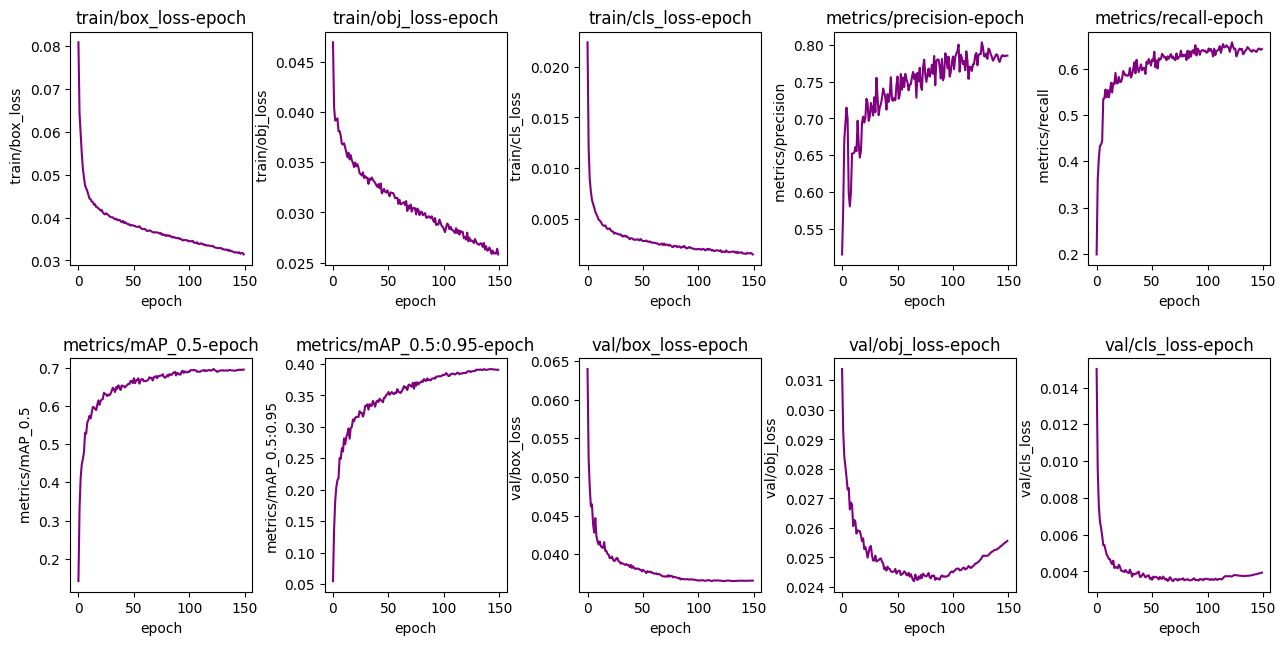

In [4]:
fig, ax = plt.subplots(2,5, figsize=(15, 7),)
cn = 5
for col_i in range(1,11):
    y1 = results[col[col_i]]
    x1 = results[col[0]]
    ax[int((col_i- 1)//cn),int((col_i- 1)%cn)].plot(x1, y1, color='purple')

    #add axis labels to plot
    ax[int((col_i- 1)//cn),int((col_i- 1)%cn)].set_title('{}-{}'.format(col[col_i].replace(" ",""),col[0].replace(" ","")))
    ax[int((col_i- 1)//cn),int((col_i- 1)%cn)].set_ylabel(col[col_i])
    ax[int((col_i- 1)//cn),int((col_i- 1)%cn)].set_xlabel('epoch')

# #display plot
# fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Object Tracker Model
## CSRT Tracker
- IOU : 0.6

In [12]:
import glob

all_files = glob.glob("/Users/rhira/Repo/Object_Detection/datasets/pred/csrt_tracker/*.csv")
result = pd. concat((pd. read_csv(f) for f in all_files))
result.columns

Index(['u_id', 'class_id', 'xmin', 'ymin', 'xmax', 'ymax', 'iou',
       'confidence'],
      dtype='object')

In [13]:
iou_mean = result[result['u_id'] == 1].iou.mean()
iou_mean

0.7052752882365156

### CSRT tracked object`s average IOU over 25 frame is: 0.7052752882365156


## DeepSOft Tracker
- IOU : 0.6

In [14]:
import glob

all_files = glob.glob("/Users/rhira/Repo/Object_Detection/datasets/pred/ds_tracker/*.csv")
result = pd. concat((pd. read_csv(f) for f in all_files))
result.columns

Index(['u_id', 'class_id', 'xmin', 'ymin', 'xmax', 'ymax', 'iou',
       'confidence'],
      dtype='object')

In [15]:
iou_mean = result[result['u_id'] == 1].iou.mean()
iou_mean

0.8859707993022399

### DeepSoft tracked object`s average IOU over 25 frame is: 0.0.8859707993022399